In [1]:
%load_ext autoreload
%cd ..

/Users/trippgordon/Desktop/Code/sonic/NoisyGAN


In [3]:
%autoreload 2
%reload_ext autoreload
from core import *

In [4]:
batch_size = 2
gan_model = GAN(batch_size=batch_size)
combined_iter = CombinedIter(gan_model.gen, 
                             FromTFRecords('./Data/piano/piano30s.tfrecord*'), 
                             batch_size=batch_size)
opt = tf.keras.optimizers.Adam()
!rm -rf ./models/

In [5]:
train_gan(gan_model,opt,opt, combined_iter,model_dir="./models/junk/", total_iters=2,audio_period=1)

INFO:absl:----- GAN Step 0 -----
INFO:absl:Disc loss: 1.3167338Gen loss: 2.7750962


INFO:absl:----- GAN Step 1 -----
INFO:absl:Disc loss: 1.4511673Gen loss: 2.7746272


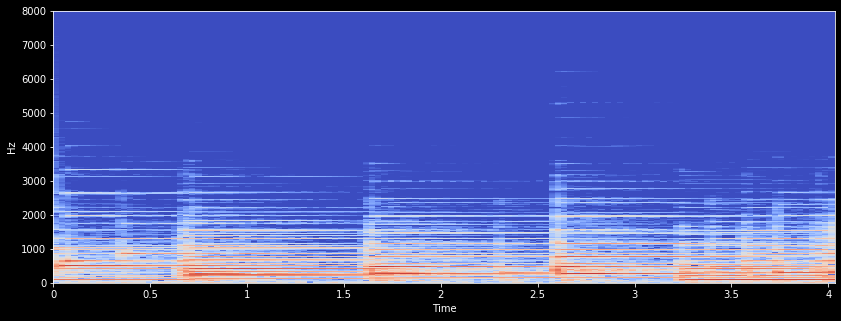

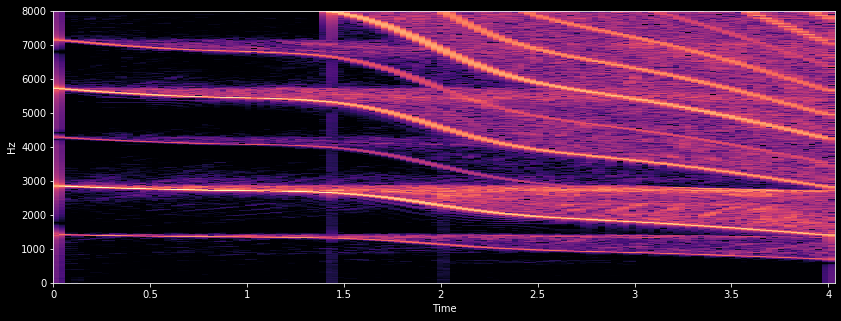

In [6]:
batch = combined_iter.getNext()
real = batch["audio"][batch_size-1]
fake = batch["audio"][0]
play(real)
play(fake)
specPlot(real)
specPlot(fake)